In [ ]:
from matplotlib import image
from matplotlib import pyplot
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

from google.colab import files as FILE
import os

import requests

In [ ]:
# download image with url
from os.path import exists as file_exists
img_name="lena_std.tif"

if(not file_exists(img_name)):
  DownURL = "http://www.lenna.org/lena_std.tif"
  img_data = requests.get(DownURL).content
  with open(img_name, 'wb') as handler:
      handler.write(img_data)
  FILE.download(img_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

image file format:  None
image size:  (512, 512)
image mode:  L


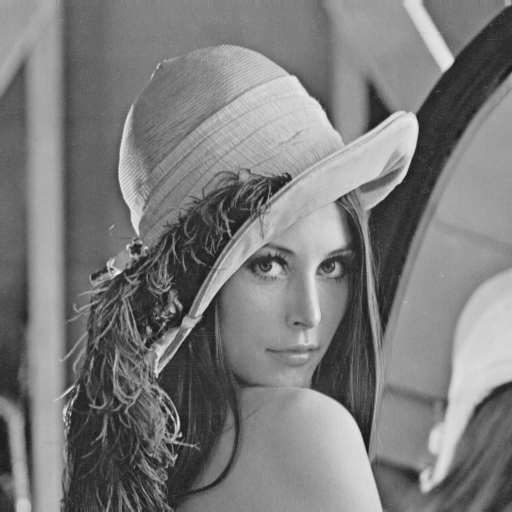

In [ ]:
# Open the image form working directory
image = Image.open(img_name)
# resize and convert to gray image
image = image.convert('L') #Luminance
# summarize some details about the image
print("image file format: ",image.format)
print("image size: ",image.size)
print("image mode: ",image.mode)
# show the image
display(image)

In [ ]:
def generate_gauss_noise_img(image, var, sigma):
  h,w = image.size
  gaussian = np.random.normal(var, sigma, (h, w)).round()
  gaussian = gaussian.reshape(h,w)
  image += gaussian
  image[image <0] = 0
  image[image >255] = 255
  image = Image.fromarray(image.astype('uint8'), 'L')
  return image


# gauss_noise_image=""
# try:
#   gauss_noise_image = Image.open("gauss_noise_image.tif")
# except:
#   gauss_noise_image = generate_gauss_noise_img(image,0,10)
#   gauss_noise_image.save("gauss_noise_image.tif")
# display(gauss_noise_image)


In [ ]:
from numpy import random
def generate_impulsive_noise(image, density, p_salt_vs_pepper =0.5):
  img_size = image.size
  num_pixel = img_size[0] * img_size[1]
  num_salt = np.ceil(p_salt_vs_pepper * num_pixel * density);
  num_pepper = np.ceil(1-p_salt_vs_pepper) * num_pixel * density;
  image = np.copy(image)
  # generate index of salt
  index = [np.random.randint(0, i - 1, int(num_salt)) for i in img_size]
  image[index] = 255
  # generate index of pepper
  index = [np.random.randint(0, i-1, int(num_pepper)) for i in img_size]
  image[index] = 0
  # create image form array
  image = Image.fromarray(image.astype('uint8'), 'L')
  return image

# hybrid_noise_image=""
# try:
#   hybrid_noise_image = Image.open("hybrid_noise_image.tif")
# except:
#   hybrid_noise_image = generate_impulsive_noise(gauss_noise_image, 0.01)
#   gauss_noise_image.save("hybrid_noise_image.tif")
# display(hybrid_noise_image)

In [ ]:
import scipy.ndimage

def peeling_filter(image, size=3,threshold=100):
  # check size must be (2n+1) x (2n+1)
  def filter(window,threshold):
    #print(type(window))
    center = int((window.size-1)/2)
    #print(center)
    med = np.median(window)
    #print(med)
    a= abs(med - window[center])
    #print(a)
    return med if a>=threshold else window[center]
  try:
    if(int(size/2)*2 != size):
      output = scipy.ndimage.generic_filter(input=image,function=filter,  size=(size,size), extra_arguments = (threshold,))
      return Image.fromarray(output.astype('uint8'), 'L')
  except:
    print("size error")


# peeling_image=""
# try:
#   peeling_image = Image.open("peeling_image.tif")
# except:
#   peeling_image= peeling_filter(hybrid_noise_image,7,90)
#   peeling_image.save("peeling_image.tif")
# display(peeling_image)

In [ ]:

def average_filter(image, size=3,threshold=20):
  def filter(window,total):
    center = int((window.size-1)/2)
    w = window - window[center]
    w = abs(w)

    w[w>=threshold] = 0
    w[w<threshold] = 1
    average = np.average(window,weights=w)
    return int(round(average))
  try:
    # check size must be (2n+1) x (2n+1)
    if(int(size/2)*2 != size):
      output = scipy.ndimage.generic_filter(input=image,function=filter,  size=(size,size), extra_arguments = (threshold,))
      return Image.fromarray(output.astype('uint8'), 'L')
  except Exception:
    print("size error")
# result_image=""
# try:
#   result_image = Image.open("result_image.tif")
# except:
#   result_image = average_filter(peeling_image)
#   result_image.save("result_image.tif")
# display(result_image)

In [ ]:
gauss_noise_image = generate_gauss_noise_img(image,0,10)
hybrid_noise_image = generate_impulsive_noise(gauss_noise_image, 0.1)

peeling_image= peeling_filter(hybrid_noise_image,7,90)
result_image = average_filter(peeling_image)
average_image = average_filter(hybrid_noise_image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


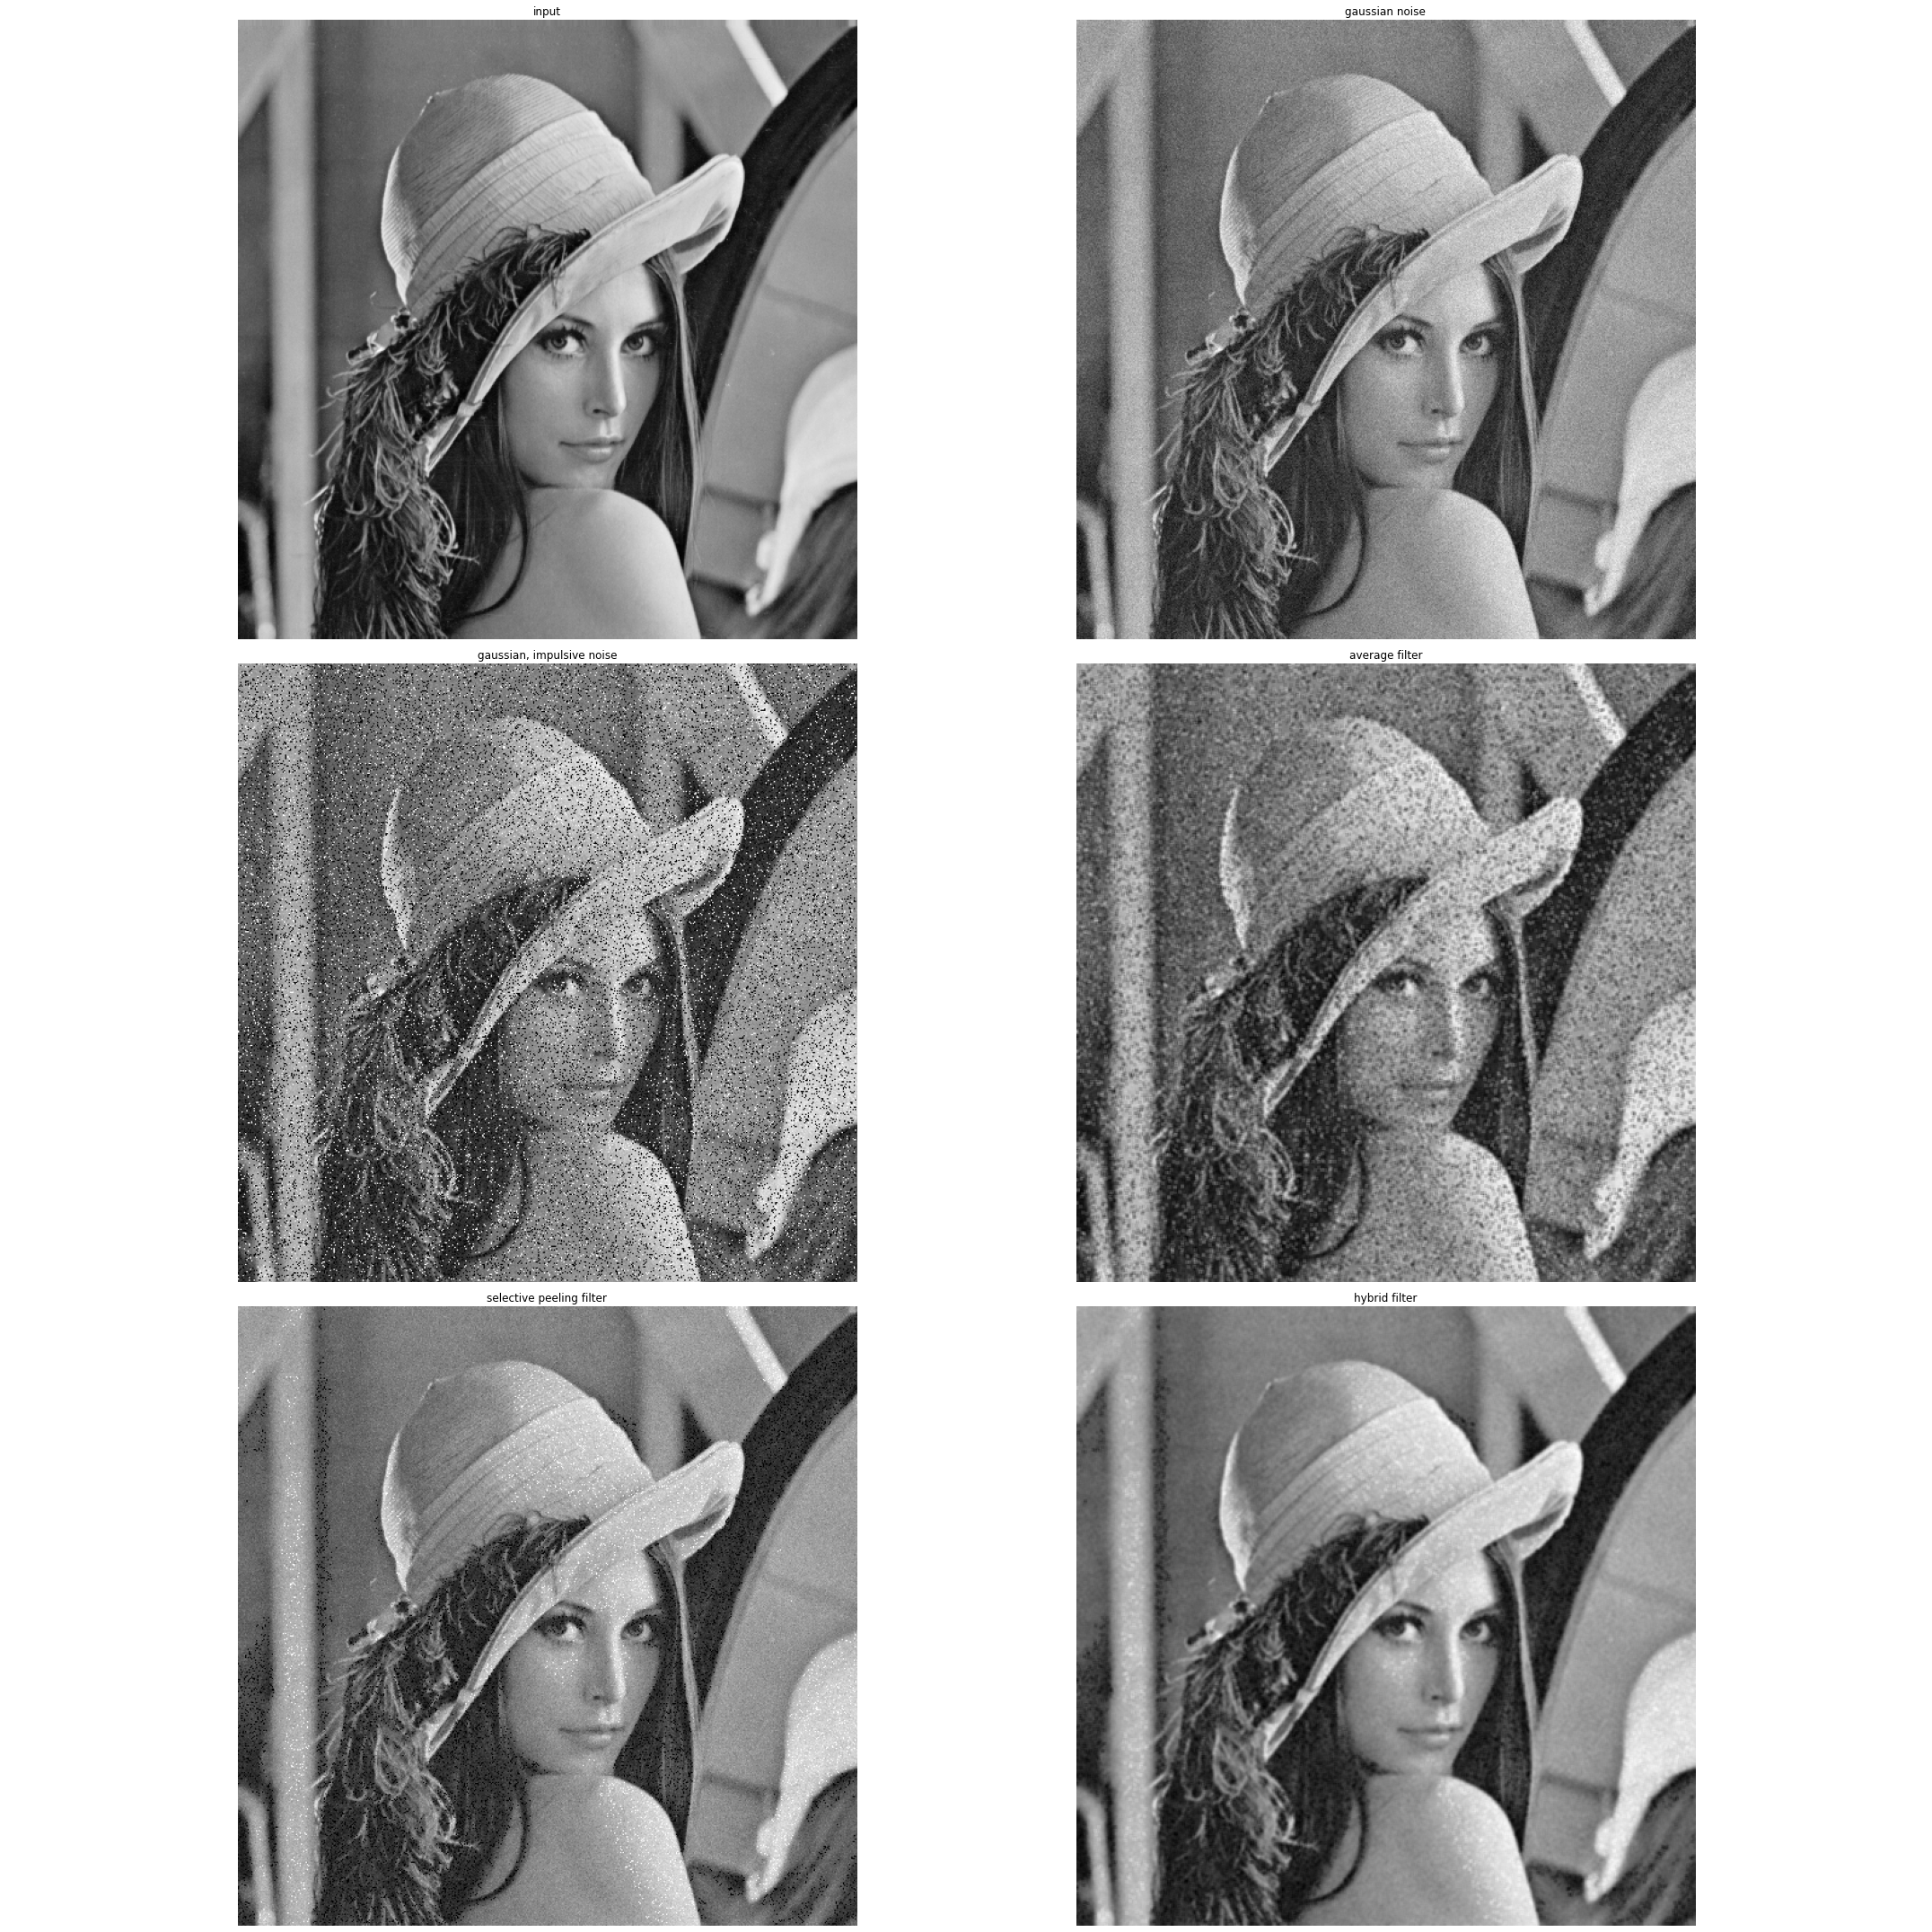

In [ ]:

fig = plt.figure(figsize=(30, 30))
plt.axis('off')

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.imshow(image, cmap='gray')
ax1.title.set_text("input")
ax1.axis('off')
ax2.imshow(gauss_noise_image, cmap='gray')
ax2.title.set_text("gaussian noise")
ax2.axis('off')
ax3.imshow(hybrid_noise_image, cmap='gray')
ax3.title.set_text("gaussian, impulsive noise")
ax3.axis('off')
ax4.imshow(average_image, cmap='gray')
ax4.title.set_text("average filter")
ax4.axis('off')
ax5.imshow(peeling_image, cmap='gray')
ax5.title.set_text("selective peeling filter")
ax5.axis('off')
ax6.imshow(result_image, cmap='gray')
ax6.title.set_text("hybrid filter")
ax6.axis('off')
fig.tight_layout()

In [ ]:
def compare(image1, image2, type="MSE" ):
  if(image1.size == image2.size):
    image1 = np.copy(image1)
    image2 = np.copy(image2)
    dif_matrix = image1 - image2
    num_pixel= image1.size
    if (type=="MSE"):
      dif_matrix = dif_matrix **2
      MSE = sum(sum(dif_matrix))/num_pixel
      return MSE

    if (type=="MAE"):
      MAE = sum(sum(dif_matrix))/num_pixel
      return MAE
  else:
    print("image1.size: ", image1.size)
    print("image2.size: ", image2.size)

threshold = np.arange(10,160,10)
hybrid_noise_image = generate_impulsive_noise(gauss_noise_image, 0.05)

out = []
peel = []
aver = []
for i in threshold:
  peeling_image= peeling_filter(hybrid_noise_image,7,threshold = i)
  result_image = average_filter(peeling_image)
  average_image = average_filter(hybrid_noise_image)
  o = compare(image, result_image)
  p = compare(image, peeling_image)
  a = compare(image, average_image)
  out.append(o)
  peel.append(p)
  aver.append(a)
  print('Threshold {:5d} | output: {:6.4f} | peeling_filter: {:6.4f}| average_filter: {:6.4f}'.format(
                    i, o, p, a))

import pickle as pkl
with open('out.pkl', 'wb') as file:
    pkl.dump(out, file)
with open('peel.pkl', 'wb') as file:
    pkl.dump(peel, file)
with open('aver.pkl', 'wb') as file:
    pkl.dump(aver, file)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
  7%|▋         | 1/15 [00:25<05:52, 25.15s/it]

Threshold    10 | output: 0.2524 | peeling_filter: 0.2527| average_filter: 0.2558


 13%|█▎        | 2/15 [00:49<05:24, 24.93s/it]

Threshold    20 | output: 0.2495 | peeling_filter: 0.2536| average_filter: 0.2558


 20%|██        | 3/15 [01:15<05:02, 25.19s/it]

Threshold    30 | output: 0.2455 | peeling_filter: 0.2465| average_filter: 0.2558


 27%|██▋       | 4/15 [01:40<04:36, 25.17s/it]

Threshold    40 | output: 0.2631 | peeling_filter: 0.2496| average_filter: 0.2558


 33%|███▎      | 5/15 [02:05<04:11, 25.10s/it]

Threshold    50 | output: 0.2500 | peeling_filter: 0.2484| average_filter: 0.2558


 40%|████      | 6/15 [02:30<03:44, 24.99s/it]

Threshold    60 | output: 0.2466 | peeling_filter: 0.2453| average_filter: 0.2558


 47%|████▋     | 7/15 [02:55<03:19, 24.96s/it]

Threshold    70 | output: 0.2583 | peeling_filter: 0.2571| average_filter: 0.2558


 53%|█████▎    | 8/15 [03:19<02:53, 24.85s/it]

Threshold    80 | output: 0.2456 | peeling_filter: 0.2551| average_filter: 0.2558


 60%|██████    | 9/15 [03:44<02:29, 24.84s/it]

Threshold    90 | output: 0.2468 | peeling_filter: 0.2526| average_filter: 0.2558


 67%|██████▋   | 10/15 [04:09<02:04, 24.82s/it]

Threshold   100 | output: 0.2450 | peeling_filter: 0.2449| average_filter: 0.2558


 73%|███████▎  | 11/15 [04:34<01:39, 24.81s/it]

Threshold   110 | output: 0.2463 | peeling_filter: 0.2597| average_filter: 0.2558


 80%|████████  | 12/15 [04:59<01:14, 24.85s/it]

Threshold   120 | output: 0.2487 | peeling_filter: 0.2487| average_filter: 0.2558


 87%|████████▋ | 13/15 [05:23<00:49, 24.81s/it]

Threshold   130 | output: 0.2445 | peeling_filter: 0.2500| average_filter: 0.2558


 93%|█████████▎| 14/15 [05:48<00:24, 24.80s/it]

Threshold   140 | output: 0.2484 | peeling_filter: 0.2588| average_filter: 0.2558


100%|██████████| 15/15 [06:13<00:00, 24.88s/it]

Threshold   150 | output: 0.2529 | peeling_filter: 0.2597| average_filter: 0.2558


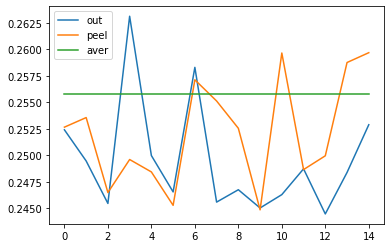

In [ ]:
plt.plot(out, label='out')
plt.plot(peel, label='peel')
plt.plot(aver, label='aver')
plt.legend()
plt.show()
